<a href="https://colab.research.google.com/github/heinhtet14/Machine_Learning_Bootcamp/blob/main/Wk1-part-2-Intro_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Let's start with Pytorch:-**
PyTorch is a library for Python programs that facilitates building deep learning projects PyTorch supports dynamic computational graphs, which means the network behavior can be changed programmatically at runtime. This facilitates more efficient model optimization and gives PyTorch a major advantage over other machine learning frameworks, which treat neural networks as static objects. If you want to explore Deep learning then Pytorch is your friend Kindly head to https://pytorch.org/docs/master/nn.html to unvail the beauty of Pytorch library
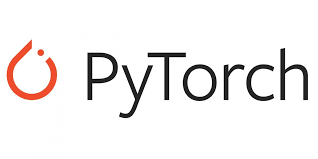



# **Basic Tensor Initialization**

What is a Tensor?

A tensor is a data structure that is the fundamental building block for machine learning and deep learning. You can think of a tensor as a generalized mathematical object that can hold data in multiple dimensions, similar to scalars, vectors, and matrices, but with more flexibility in the number of dimensions.
In PyTorch (and machine learning in general), tensors are used to represent and manipulate data efficiently.
To make it simple:

Scalars are single numbers.
Vectors are 1D arrays of numbers (like a list).
Matrices are 2D arrays of numbers (like a grid or table).
Tensors are the generalization of these data structures to higher dimensions.



![alt text](https://github.com/heinhtet14/Machine_Learning_Bootcamp/blob/main/images/1686308835063.png?raw=1)


In [ ]:
import torch # We start by importing PyTorch Library

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
my_tensor = torch.tensor([[1,2,3], [4,5,6]], dtype=torch.float32,
                         device=device) # We created a tensor which consists of two rows 3 columns ; [1,2,3] : 1st row, [4,5,6] : 2nd row
print(my_tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')


In [ ]:
# Other Useful Attributes of Tensor
print(my_tensor.dtype) # print your tensor datatype
print(my_tensor.device)# print which device your tensor is on
print(my_tensor.shape) # shape of your tensor

torch.float32
cuda:0
torch.Size([2, 3])


In [ ]:
# Other Common Initialization Methods
x = torch.empty(size= (3,3)) # Create an empty set of 3x3 matrix or tensor. There is no zero
x = torch.zeros((3,3))       # A tensor with zeros
x = torch.rand((3,3))        # A random tensor between 0 and 1
x = torch.ones((3,3))        # A 3x3 matrix of ones
x = torch.eye(5,5)         # Create an identity matrix , I = eye
print(x)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


In [ ]:
# Basic Tensor Operations
sum_x = torch.sum(x, dim=0)
values, indices = torch.max(x, dim=0) # Returns the values and the indices of the maximum values
values, indices = torch.min(x, dim=0) # Returns the values and the indices of the min values
abs_x = torch.abs(x) # Absolute Value
z = torch.argmax(x, dim=0) # Same thing as torch.max but only returns the index of the one that is the maximum


In [ ]:
# Tensor Indexing
# For example, we have a batch size of 10 and 25 features in a batch
batch_size = 10
features   = 25
x = torch.rand((batch_size, features))

# Let's say we want to get a feature of first example
print(x[0].shape) # It is the same as x[0,:] where 0 = first example of the batch,  : = represents all the features

# First feature of all example
print(x[:,0].shape)


torch.Size([25])
tensor([0.7348, 0.2161, 0.3553, 0.0185, 0.0885, 0.7970, 0.7857, 0.7306, 0.5689,
        0.7863])


In [ ]:
tensor1 = torch.Tensor([1, 2, 3])
# Reshaping a Tensor
tensor2 = torch.reshape(tensor1, (3, 1)) # Reshaping the original tensor (1x3) to (3x1) dimension
print(tensor2)

# Element-wise Operations
tensor3 = tensor1 + tensor2
print(tensor3)

# Matrix Operations
tensor4 = torch.matmul(tensor2, tensor2.T) # Matrix multiplication
print(tensor4)

# Indexing and Slicing
print(tensor1[0])
print(tensor1[0:2])

# Broadcasting allows you to perform operations between tensors of different shapes or sizes without having to explicitly reshape or expand them
# Creating two tensors of different shapes which are immposible to calculate in mathematical terms but operatable in PyTorch
#tensor5 = torch.Tensor([1, 2, 3])
tensor5 = torch.Tensor([1, 2])
tensor6 = torch.Tensor([[1, 2], [3, 4], [5, 6]])
tensor7 = tensor5 + tensor6
print(tensor7)

# Concatenation
tensor8 = torch.Tensor([4, 5, 6])
tensor9 = torch.cat([tensor1, tensor8], dim=0)
print(tensor9)

tensor([[1.],
        [2.],
        [3.]])
tensor([[2., 3., 4.],
        [3., 4., 5.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])
tensor(1.)
tensor([1., 2.])
tensor([[2., 4.],
        [4., 6.],
        [6., 8.]])
tensor([1., 2., 3., 4., 5., 6.])


Why Are Tensors Important in Machine Learning?
Tensors are central to machine learning because:

Efficient Computation: Tensors allow PyTorch (and other frameworks) to perform fast computations on CPUs and GPUs.
Flexibility: They can easily represent different kinds of data (e.g., 1D, 2D, 3D) which is crucial in handling diverse data types such as images, audio, and text.
Gradient Tracking: PyTorch tensors, when used with Autograd, can automatically compute gradients needed for optimizing models during training.

Tensors can represent different types of real-world data:

1D: Sensor readings (e.g., temperature over time).

2D: Grayscale images or spreadsheets.

3D: RGB images (height, width, color channels).

4D: Videos (frames, height, width, color channels).

# **Autograd**
 Autograd allows PyTorch to automatically and efficiently calculate the gradients of a function with respect to its inputs using the chain rule of calculus.

In [ ]:
# Define a tensor with requires_grad=True to track the gradient
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Define a function to compute the output
def forward(x):
    y = x**2 + 2*x + 1
    return y.sum()
    # Compute the output of the function
y = forward(x)
print(y)

# Compute the gradients of the output with respect to the input
y.backward()

# Print the gradients of the input tensor
print(x.grad)

tensor(29., grad_fn=<SumBackward0>)
tensor([4., 6., 8.])


# **Introduction to Neural Networks**
We will discuss about defining the layers, activation functions, loss function and optimizer step by step

In [ ]:
# Import classes to inherit in order to define the neural network
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Define the neural network architecture
class Net:
    def __init__(self):
        self.fc1_w = torch.randn(2, 4, requires_grad=True) # input layer (2 nodes) -> hidden layer (4 nodes)
        self.fc1_b = torch.randn(4, requires_grad=True)
        self.fc2_w = torch.randn(4, 1, requires_grad=True) # hidden layer (4 nodes) -> output layer (1 node)
        self.fc2_b = torch.randn(1, requires_grad=True)

    def forward(self, x):
        x = torch.sigmoid(torch.matmul(x, self.fc1_w) + self.fc1_b)
        x = torch.matmul(x, self.fc2_w) + self.fc2_b
        return x

In [ ]:
# Define the loss function
criterion = nn.MSELoss()

In [ ]:
# Define the optimizer
net = Net()
optimizer = torch.optim.SGD([net.fc1_w, net.fc1_b, net.fc2_w, net.fc2_b], lr=0.1)

In [ ]:
# Define the training data
train_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
train_labels = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

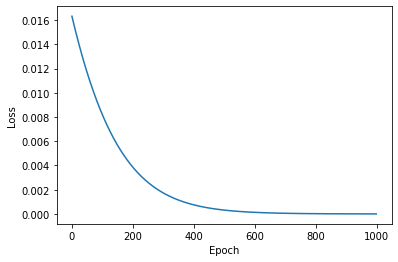

In [ ]:
# Train the neural network
loss_values = []
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net.forward(train_data)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())

# Plot the loss curve
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate the trained neural network
test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_labels = net.forward(test_data)
print(test_labels)

tensor([[0.0014],
        [0.9982],
        [0.9982],
        [0.0025]], grad_fn=<AddBackward0>)


In [1]:
# Install PyTorch
# pip install torch torchvision

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

**Linear Regression Example**

In [4]:
# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        # Linear layer (input_dim -> output_dim)
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # Simple forward pass
        return self.linear(x)

# Create an instance of the model
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

print(f"Model structure: {model}")
# Check model parameters
for name, param in model.named_parameters():
    print(f"Parameter {name}: {param.shape}")

Model structure: LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Parameter linear.weight: torch.Size([1, 1])
Parameter linear.bias: torch.Size([1])


**Multi-Layer Neural Network**

In [ ]:
# Define a more complex neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Architecture: 784 (input) -> 128 -> 64 -> 10 (output)
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 128),  # First hidden layer
            nn.ReLU(),              # Activation function
            nn.Linear(128, 64),     # Second hidden layer
            nn.ReLU(),              # Activation function
            nn.Linear(64, 10)       # Output layer
        )

    def forward(self, x):
        # Flatten the input image
        x = self.flatten(x)
        # Pass through the sequential layers
        logits = self.layers(x)
        return logits

# Create model instance and examine structure
model = NeuralNetwork()
print(model)

# Get total number of parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

**Training a Simple Model**

**Create a Synthetic Dataset**

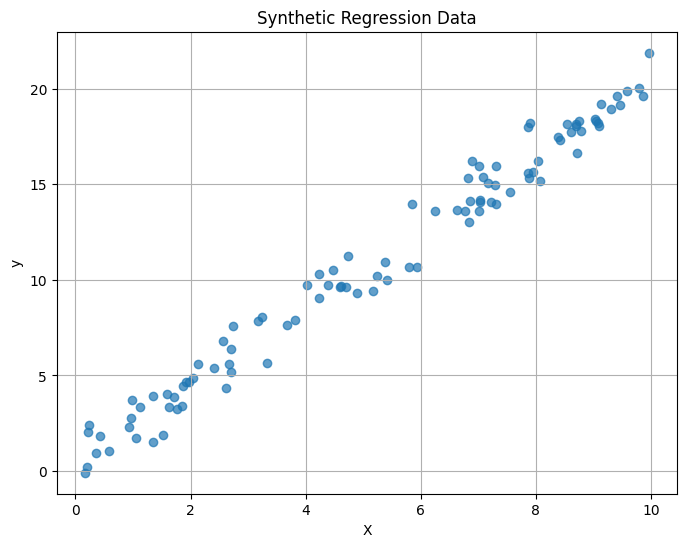

In [2]:
# Generate synthetic regression data
def generate_data(n_samples=100):
    # True parameters: w=2, b=0.5
    X = torch.rand(n_samples, 1) * 10  # Random input between 0 and 10
    y = 2 * X + 0.5 + torch.randn(n_samples, 1) * 1.0  # Add some noise
    return X, y

# Generate data
X_train, y_train = generate_data(100)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), alpha=0.7)
plt.title('Synthetic Regression Data')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

Training Loop

Epoch [10/100], Loss: 0.8152
Epoch [20/100], Loss: 0.8132
Epoch [30/100], Loss: 0.8113
Epoch [40/100], Loss: 0.8097
Epoch [50/100], Loss: 0.8082
Epoch [60/100], Loss: 0.8068
Epoch [70/100], Loss: 0.8056
Epoch [80/100], Loss: 0.8045
Epoch [90/100], Loss: 0.8035
Epoch [100/100], Loss: 0.8026
Learned parameters: w = 1.9601, b = 0.7374
True parameters: w = 2.0000, b = 0.5000


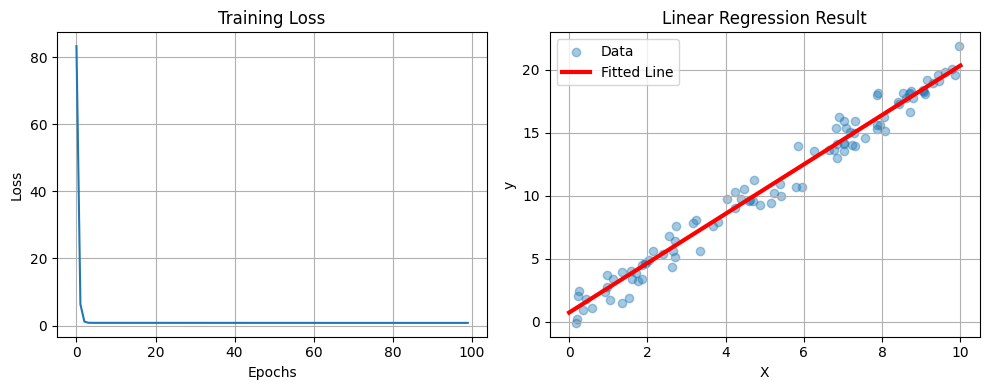

In [5]:
# Initialize the model
model = LinearRegressionModel(input_dim=1, output_dim=1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training parameters
num_epochs = 100

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train)

    # Compute and print loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # Zero gradients, backward pass, and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Get the learned parameters
with torch.no_grad():
    w = model.linear.weight.item()
    b = model.linear.bias.item()
    print(f"Learned parameters: w = {w:.4f}, b = {b:.4f}")
    print(f"True parameters: w = 2.0000, b = 0.5000")

# Plot the result
plt.figure(figsize=(10, 4))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

# Plot the data and the learned model
plt.subplot(1, 2, 2)
plt.scatter(X_train.numpy(), y_train.numpy(), alpha=0.4, label='Data')

# Generate points for the learned line
x_range = torch.linspace(0, 10, 100).reshape(-1, 1)
with torch.no_grad():
    y_range = model(x_range)

plt.plot(x_range.numpy(), y_range.numpy(), 'r-', linewidth=3, label='Fitted Line')
plt.title('Linear Regression Result')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Practical Example: Image Classification**

Let's build and train a convolutional neural network (CNN) for image classification using the MNIST dataset.